In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [38]:
dataset=pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [39]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [41]:
label_encoder = LabelEncoder()
dataset['sentiment'] = label_encoder.fit_transform(dataset['sentiment'])

In [42]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [43]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [44]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

corpus = []
for review in dataset['review'][:50000]:
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))

In [45]:
stop_words = set(stopwords.words('english'))
ss = SnowballStemmer(language='english')

scorpus = []
for review in dataset['review'][:50000]:
    review = re.sub(r'<.*?>|[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [ss.stem(word) for word in review if word not in stop_words]
    scorpus.append(' '.join(review))

In [46]:
corpus_vocab_size = len(set(' '.join(corpus).split()))
print(f"Vocabulary size after PorterStemmer: {corpus_vocab_size}")
corpus_word_freq = Counter(' '.join(corpus).split())
top_30_corpus = corpus_word_freq.most_common(30)

Vocabulary size after PorterStemmer: 69011


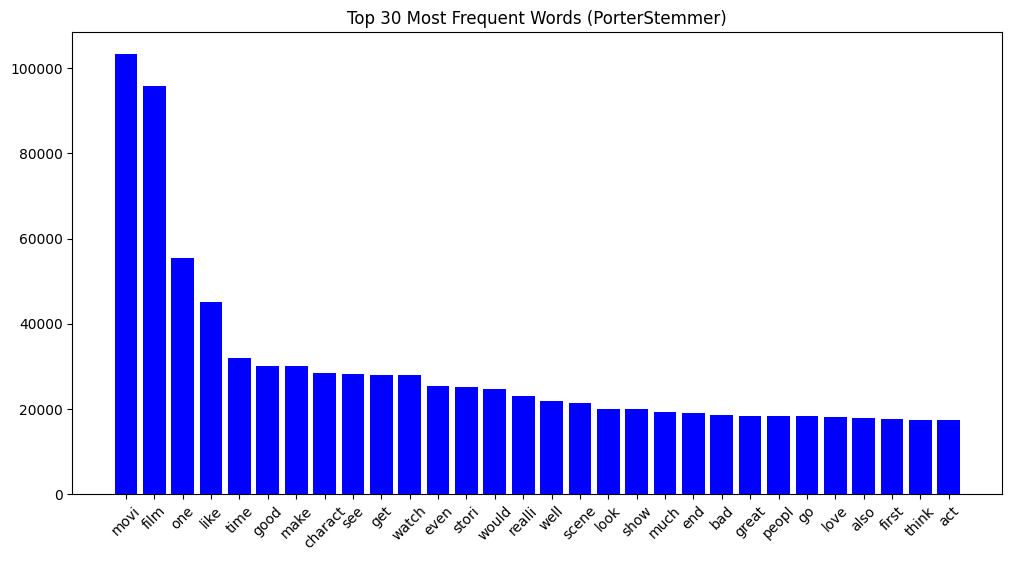

In [47]:
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_corpus], [freq for word, freq in top_30_corpus], color='blue')
plt.title('Top 30 Most Frequent Words (PorterStemmer)')
plt.xticks(rotation=45)
plt.show()

In [48]:
corpus_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus))

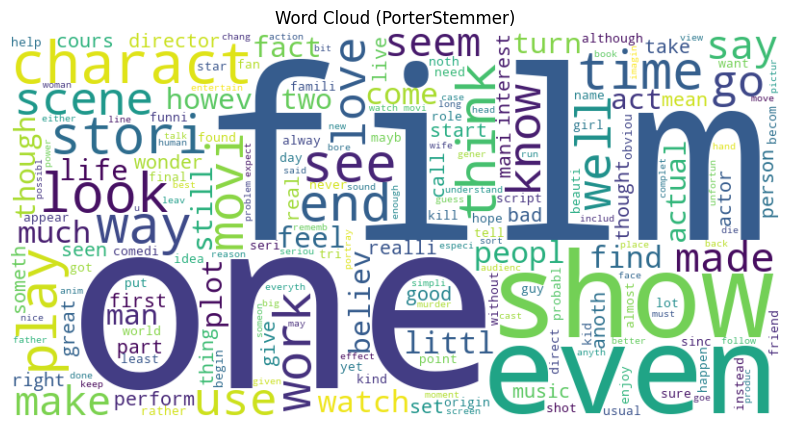

In [49]:
plt.figure(figsize=(10, 5))
plt.imshow(corpus_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (PorterStemmer)')
plt.show()

In [50]:
scorpus_vocab_size = len(set(' '.join(scorpus).split()))
print(f"Vocabulary size after SnowballStemmer: {scorpus_vocab_size}")
scorpus_word_freq = Counter(' '.join(scorpus).split())
top_30_scorpus = scorpus_word_freq.most_common(30)

for word, freq in top_30_scorpus:
    print(f"{word}: {freq}")

Vocabulary size after SnowballStemmer: 68203
movi: 103283
film: 95890
one: 55453
like: 45210
time: 31967
good: 30199
make: 30034
charact: 28364
see: 28244
get: 27973
watch: 27880
even: 25383
stori: 25285
would: 24602
realli: 23095
well: 21793
scene: 21452
look: 19951
show: 19914
bad: 19828
much: 19321
end: 19100
great: 18711
peopl: 18384
love: 18298
go: 18254
also: 17977
first: 17752
think: 17546
act: 17494


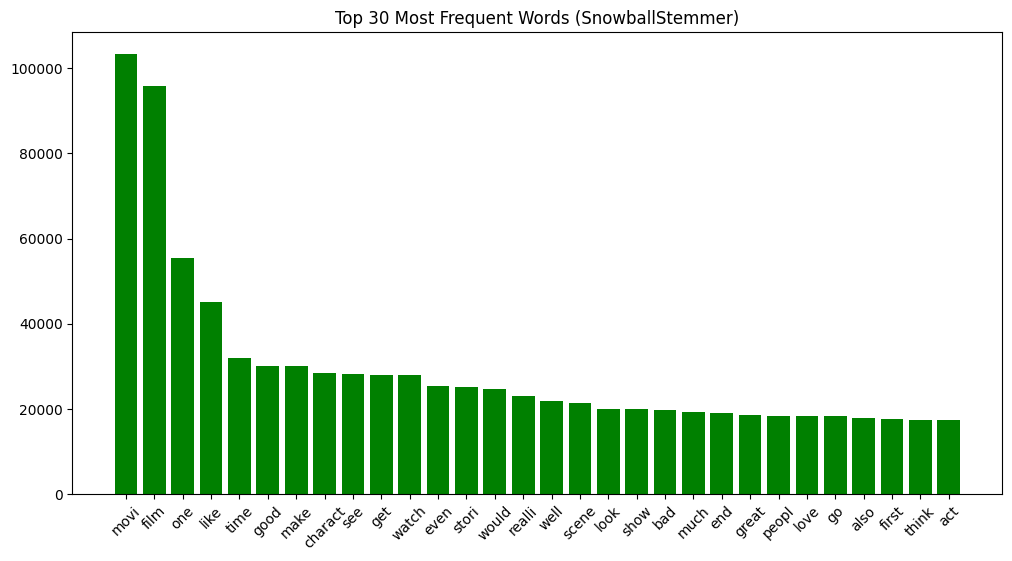

In [51]:
plt.figure(figsize=(12, 6))
plt.bar([word for word, freq in top_30_scorpus], [freq for word, freq in top_30_scorpus], color='green')
plt.title('Top 30 Most Frequent Words (SnowballStemmer)')
plt.xticks(rotation=45)
plt.show()

In [52]:
scorpus_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(scorpus))

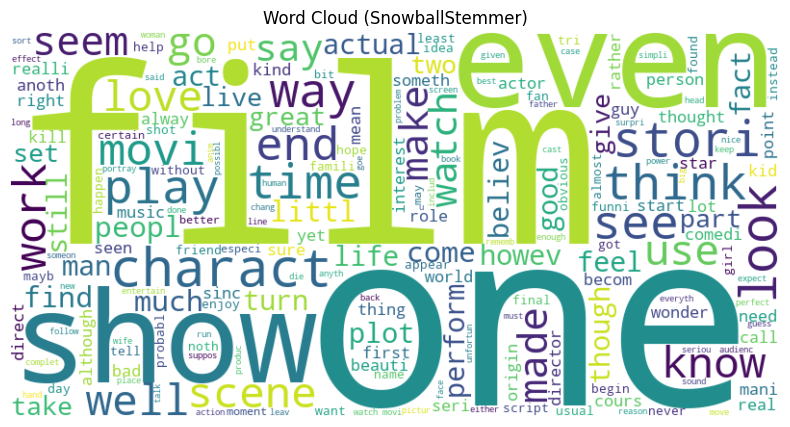

In [53]:
plt.figure(figsize=(10, 5))
plt.imshow(scorpus_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (SnowballStemmer)')
plt.show()

In [54]:
print("Analysis:")
print(f"The vocabulary size after PorterStemmer is {corpus_vocab_size}, while after SnowballStemmer it is {scorpus_vocab_size}.")
print("PorterStemmer tends to produce a smaller vocabulary size as it is more aggressive in stemming.")
print("SnowballStemmer retains slightly more unique words, which may preserve more information.")
print("The bar plots and word clouds show the frequency and distribution of words, highlighting differences in vocabulary richness.")

Analysis:
The vocabulary size after PorterStemmer is 69011, while after SnowballStemmer it is 68203.
PorterStemmer tends to produce a smaller vocabulary size as it is more aggressive in stemming.
SnowballStemmer retains slightly more unique words, which may preserve more information.
The bar plots and word clouds show the frequency and distribution of words, highlighting differences in vocabulary richness.
